<a href="https://colab.research.google.com/github/Hikachhu/UtilsJupyterNotebook/blob/main/TD3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Analyse des donnée

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time
import statistics
!pip install colorama
from colorama import Fore, Back, Style

simplefilter("ignore", category=ConvergenceWarning)

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

1) Charger la base de données digits disponible sous sklearn.

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

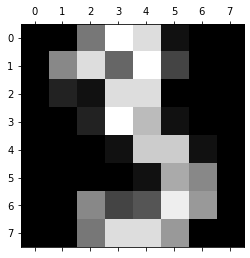

In [3]:
plt.gray()
plt.matshow(digits.images[3]) #index est le numéro de l’image
plt.show()

In [4]:
X = digits.data
y = digits.target

2) Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) 
(model_selection.train_test_split).

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=0.7,test_size=0.3)

#2. Apprentissage

In [6]:
def train_multi(C,early_stop=False):
  clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0,early_stopping=early_stop)
  clf2.fit(X_train,y_train)
  return clf2

final cost : 1.8890921786930879 / it = 75
final cost : 0.8357554575569759 / it = 100
final cost : 0.2861776965335504 / it = 100
final cost : 0.10902108720789305 / it = 100
final cost : 0.08755078695799245 / it = 100
final cost : 0.11718802384104192 / it = 100
final cost : 0.06614007312809472 / it = 100
final cost : 0.04791506836041431 / it = 100
final cost : 0.036073867255740806 / it = 100


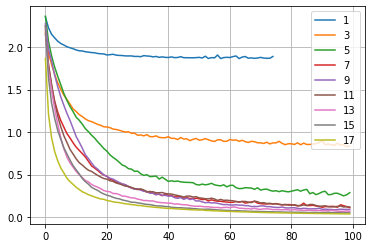

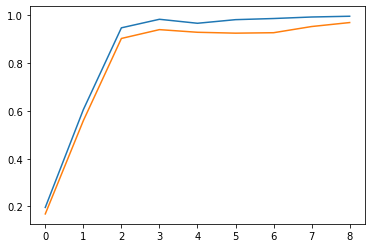

Train:  Mean:0.851233094669849  Variance:0.06754656905506656
Test :  Mean:0.8088477366255145  Variance:0.06535800775627022


In [20]:
#Prend environ 5m07 à s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,18,2):
  clf=train_multi(i)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))
plt.show()
plt.plot(clfScoreTrain)
plt.plot(clfScoreTest)
plt.show()
print("Train:  Mean:{}  Variance:{}".format(np.mean(clfScoreTrain),np.var(clfScoreTrain)))
print("Test :  Mean:{}  Variance:{}".format(np.mean(clfScoreTest),np.var(clfScoreTest)))

In [21]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i,clfScoreTrain[i],clfScoreTest[i]))

i=0 train score=0.1957040572792363	 test score=0.1685185185185185
i=1 train score=0.6054097056483692	 test score=0.5592592592592592
i=2 train score=0.9482895783611774	 test score=0.9037037037037037
i=3 train score=0.9840891010342084	 test score=0.9407407407407408
i=4 train score=0.9673826571201273	 test score=0.9296296296296296
i=5 train score=0.9824980111376292	 test score=0.9259259259259259
i=6 train score=0.9872712808273667	 test score=0.9277777777777778
i=7 train score=0.9936356404136834	 test score=0.9537037037037037
i=8 train score=0.9968178202068417	 test score=0.9703703703703703


Archi optimal est 7 neurones cachés

# 3. Cross-validation


In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [53]:
#Prend 8min05
train_score=[]
test_score=[]
clf = MLPClassifier(hidden_layer_sizes=9,validation_fraction=0.2,early_stopping=True, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0)
for i in range(0,10):
  cv_results = cross_validate(clf,X_train,y_train,cv=5,return_train_score=True)
  name_array=sorted(cv_results.keys())
  test_score.append(np.mean(cv_results['test_score']))
  train_score.append(np.mean(cv_results['train_score']))
print("test_score mean :",np.mean(test_score))
print("train_score mean :",np.mean(train_score))


test_score mean : 0.870736419401758
train_score mean : 0.9250595729107939


final cost : 1.9053927074062453 / it = 15
final cost : 2.3026636115481276 / it = 12
final cost : 1.86688237734833 / it = 20
final cost : 1.0902946021454651 / it = 23
final cost : 0.7251060658951575 / it = 44
final cost : 0.45366166927010965 / it = 41
final cost : 0.3251573276174651 / it = 63
final cost : 0.4260595073976373 / it = 47
final cost : 0.21385321856464704 / it = 63


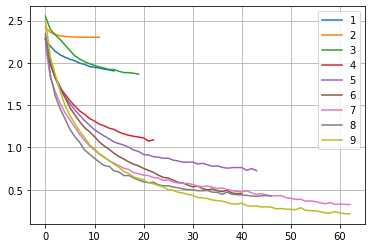

In [ ]:
#Prend environ à 2m29 s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(i,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))

In [ ]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i+1,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.2012728719172633	 test score=0.18518518518518517
i=2 train score=0.40652346857597454	 test score=0.3333333333333333
i=3 train score=0.3858392999204455	 test score=0.3388888888888889
i=4 train score=0.7271280827366746	 test score=0.6388888888888888
i=5 train score=0.6817820206841687	 test score=0.6537037037037037
i=6 train score=0.5656324582338902	 test score=0.5166666666666667
i=7 train score=0.8353221957040573	 test score=0.7574074074074074
i=8 train score=0.883054892601432	 test score=0.8074074074074075
i=9 train score=0.9474940334128878	 test score=0.9


final cost : 0.3929116619677451 / it = 50
final cost : 0.4713227518587745 / it = 39
final cost : 0.4479210150809248 / it = 44
final cost : 0.35955394308971383 / it = 48
final cost : 0.23983393689745458 / it = 57
final cost : 0.4963315917381137 / it = 26
final cost : 0.32900185818175937 / it = 70
final cost : 0.48429003165280265 / it = 45
final cost : 0.4357309609486843 / it = 41
Train mean:0.8876513745248827 var:0.000789114455420585
Test mean:0.8516460905349793 var:0.0004751138884655121


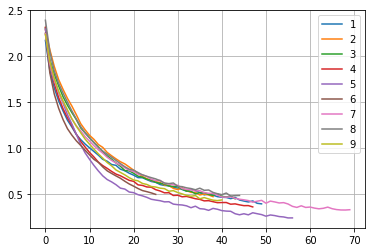

In [8]:
#Prend environ 3min35 à s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(7,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))
print("Train mean:{} var:{}".format(np.mean(clfScoreTrain),np.var(clfScoreTrain)))
print("Test mean:{} var:{}".format(np.mean(clfScoreTest),np.var(clfScoreTest)))

#4. Rejet

In [7]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))
    return y_masked.filled(-1)
 
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))
    return y_masked.filled(-1)

In [ ]:
masker=argmax_reject_threshold(clf.predict_proba(X_test),0.5)
unique, counts = np.unique(masker, return_counts=True)
print("{} {}".format(len(masker),dict(zip(unique, counts))[-1]))

540 74


In [57]:
longueurTotal=15
pos=0
tauxReussite=0.5
masker=argmax_reject_threshold(clf.predict_proba(X_test),tauxReussite)
prediction=clf.predict_proba(X_test)[0:longueurTotal]
truncadte=np.array(trunc(np.array(prediction), decs=3))
for i in truncadte:
  here=list(i)
  trie=sorted(here,reverse=True)
  duo=[]
  for a in trie:
    duo.append([here.index(a),a])
  if duo[0][1] < 0.5:
      print(Fore.RED+str(pos)+" "+str(duo[0:3])+Fore.RESET)
  else:
      print(str(pos)+" "+str(duo[0:3]))
  pos+=1

print("\n")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(y_test[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(y_test[i]),end=" ")
print("")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  elif(masker[i] != y_test[i]):
    print(Fore.BLUE+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(masker[i]),end=" ")
print("\n")
unique, counts = np.unique(masker, return_counts=True)
nbrOutput=len(masker)
nbrEchecCuissant=dict(zip(unique, counts))[-1]

print("Il y a en tout {} sorties dont {} avec une valeur max inférieur à {} ce qui fais un score de {}".format(nbrOutput,nbrEchecCuissant,tauxReussite,trunc(nbrEchecCuissant/nbrOutput,6)))

0 [[8, 0.325], [2, 0.248], [1, 0.17]]
1 [[3, 0.416], [9, 0.353], [2, 0.094]]
2 [[7, 0.682], [1, 0.117], [9, 0.085]]
3 [[2, 0.592], [9, 0.161], [3, 0.097]]
4 [[5, 0.876], [1, 0.043], [0, 0.024]]
5 [[8, 0.572], [6, 0.177], [0, 0.102]]
6 [[8, 0.324], [2, 0.249], [1, 0.171]]
7 [[3, 0.417], [9, 0.353], [2, 0.094]]
8 [[1, 0.787], [7, 0.068], [2, 0.039]]
9 [[7, 0.698], [8, 0.098], [1, 0.095]]
10 [[1, 0.787], [7, 0.068], [2, 0.039]]
11 [[3, 0.417], [9, 0.353], [2, 0.094]]
12 [[4, 0.892], [5, 0.032], [6, 0.027]]
13 [[2, 0.322], [8, 0.242], [1, 0.148]]
14 [[6, 0.799], [8, 0.069], [5, 0.061]]


08 03 09 02 05 08 06 03 01 07 01 09 04 03 06 
-1 -1 07 02 05 08 -1 -1 01 07 01 -1 04 -1 06 

Il y a en tout 540 sorties dont 147 avec une valeur max inférieur à 0.5 ce qui fais un score de 0.272222


In [56]:
clf=train_multi(7,True)

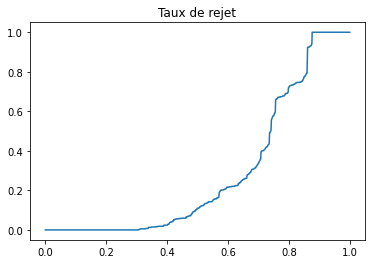

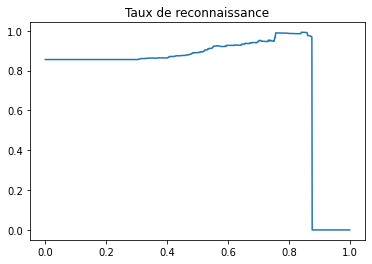

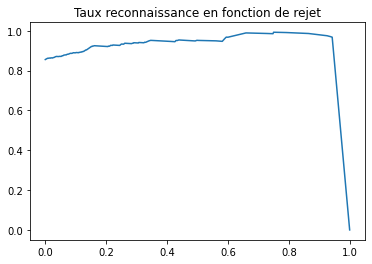

In [10]:
nbrunder=[]
ordonnee=[]
totalRatio=[]
same=[]
prediction=clf.predict_proba(X_test)
for i in np.linspace(0,1,1000,endpoint=False):
  masker=argmax_reject_threshold(prediction,i)
  unique, counts = np.unique(masker, return_counts=True)
  nbrOutput=len(masker)
  try:    
    nbrEchecCuissant=dict(zip(unique, counts))[-1]
    nbrunder.append(nbrEchecCuissant/nbrOutput)
  except Exception as e:
    nbrunder.append(0)
  
  filtrer=[]
  value=[]
  ratio=0
  for z in range(0,len(masker)):
    if(masker[z] != -1):
      filtrer.append(masker[z])
      value.append(y_test[z])
  for z in range(0,len(filtrer)):
    if(filtrer[z]==value[z]):
      same.append(filtrer[z])
      ratio+=1
  if(len(filtrer)==0):
    totalRatio.append(0)
  else:
    totalRatio.append(ratio/len(filtrer))

  ordonnee.append(i)
plt.plot(ordonnee,nbrunder)
plt.title("Taux de rejet")
plt.show()
plt.plot(ordonnee,totalRatio)
plt.title("Taux de reconnaissance")
plt.show()
plt.plot(nbrunder,totalRatio)
plt.title("Taux reconnaissance en fonction de rejet")
plt.show()